# Aula 4

---

**Saulo Martiello Mastelini**<br>
Candidato a Ph.D. pelo ICMC-USP<br>
Online Machine Learning

Página pessoal: [smastelini](https://smastelini.github.io/)</br>
e-mail: saulomastelini@gmail.com

---

## Sumário:

- Regressão linear
- Regressão logística
- Support Vector Machines
- Regularização
- Métricas de avaliação para regressão
- Visualização de fronteiras de decisão

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn import linear_model as lm

## 1. Modelos lineares (regressão)

In [2]:
x, y = make_regression(
    n_samples=200,
    n_features=1,
    n_informative=1,
    noise=10,
    random_state=42
)

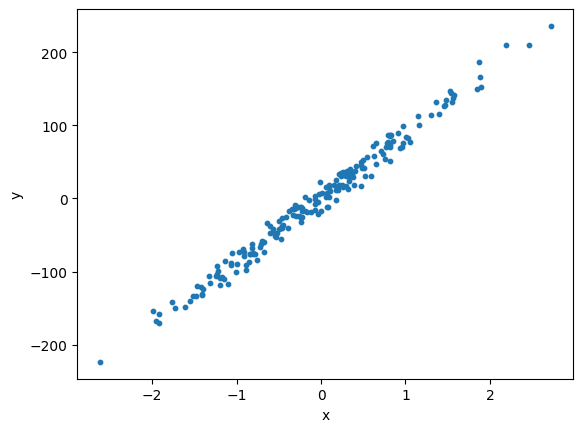

In [3]:
plt.scatter(x=x[:, 0], y=y, s=10)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### 1.1. Voltando para álgebra linear

- Equação da reta, em sua forma mais básica:
$$y = w_1 x + w_0$$
- $Ax = b$
    - $n$ linhas e $m$ colunas
- Solução (num mundo ideal)
    - $x = A^{-1}b$
- $A$ deve ser quadrada
    - $m = n$
- $A$ deve ser inversível
- Não pode haver haver correlação entre as colunas em A
- # TODO continuar aqui

- Regressão simples x múltipla
    - Estamos falando de tarefas de regressão aqui

- ML cria também modelos lineares
    - Em geral, regressão múltipla

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n$$

- O termo `w_0` é chamado bias, ou também, intercepto (_intercept_).
    - O ponto onde a reta resultante cruza o eixo y (eixo das ordenadas)
        - x é o eixo das abcissas

- _Ordinary Least Squares_: versão básica da regressão
    - Minimiza $\min\limits_w\|Xw - y\|_2^2$
- A resolução do sistema linear resultante nos dará os valores de `w` (coeficientes lineares)
    - Na vida real, os requisitos necessários para inverter $X$ raramente são atendidos
    - Solução aproximada!

- Usando o jargão de ML:
    - $X = A$
    - $y = b$

In [4]:
lr = lm.LinearRegression()
lr.fit(x, y)

LinearRegression()

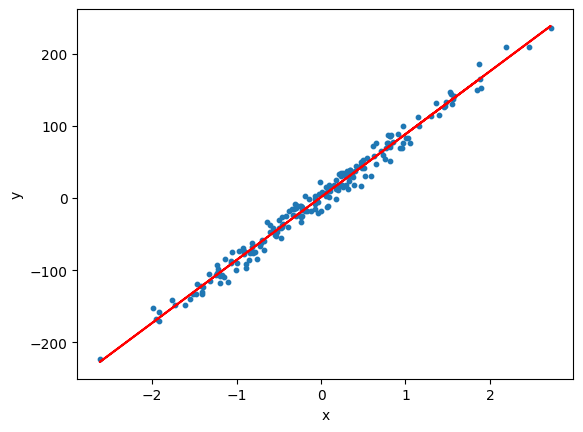

In [5]:
plt.scatter(x=x[:, 0], y=y, s=10)
plt.plot(x[:, 0], lr.predict(x), c="red")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [6]:
lr.coef_, lr.intercept_

(array([87.36641987]), 1.4285139010211894)

- Estratégias usuais: _Singular Value Decomposition_ (SVD) e _Stochastic Gradient Descent_ (SGD)
- O SVD também é utilizado na Análise de Componentes Principais (PCA - _Principal Component Analysis_)
    - Que abordaremos na aula de hoje
- O SGD é um componente essencial das redes neurais e deep learning!
    - Iremos abordá-lo futuramente
- Tanto o SVD, quanto o SGD podem ser usado para resolverem sistemas lineares
    - Parece pouco?
    - Espero mudar sua opinião

### 1.2. Singular Value Decomposition

- SVD: $A = U \Sigma V^T$
    - Decompõe uma matriz com dimensões quaisquer no produto de três matrizes
    - $A$: $m\times n$
    - $U$: $m \times m$
    - $\Sigma$: $m \times n$
    - $V$: $n \times n$
- $U$ e $V$ são matrizes unitárias:
    - $UU^T = I$
    - $VV^T = I \rightarrow$ matriz identidade
        - Diagonal com $1$ e o restante $0$
- $\Sigma$ é uma matriz diagonal
    - Todos os valores (exceto na diagonal) são zero
- Aproximamos $A^{-1}$ utilizando $\text{SVD}^{-1}$
- Propriedade da SVD:
    - $(U\Sigma V^T)^{-1} = V\Sigma^{-1}U^T = A^+$
    
- Nós utilizamos $A^+$ como uma aproximação para $A^{-1}$

- Aplicando o SVD no nosso problema introdutório:



In [7]:
# Adicionamos uma coluna com 1's para representar o termo de bias:
#    1 x qualquer coisa = qualquer coisa
A = np.column_stack([x, np.ones(x.shape[0])])

In [8]:
U, S, Vt = np.linalg.svd(A, full_matrices=False)

In [9]:
U.shape, Vt.shape, np.diag(S).shape

((200, 2), (2, 2), (2, 2))

In [10]:
w = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ y


In [11]:
w

array([87.36641987,  1.4285139 ])

- Agora sabemos de onde os coeficientes vêm.
- Propriedade interessante do SVD:
    - Podemos combinar os elementos de $U$ e $V^T$ escalados pela entrada correspondente em $\Sigma$
    - Reconstruir de forma aproximada a matriz original
    
<figure>
      
</figure>

<figure>
  <img src="https://sthalles.github.io/assets/svd-for-regression/rank-approximations.png" width="700px">
  <figcaption>Fonte: <a href="https://sthalles.github.io/svd-for-regression/">Understanding Linear Regression using the Singular Value Decomposition
</a>
  </figcaption>
</figure>

- Essa é a base da PCA

- Podemos utilizar os modelos lineares para resolver problemas mais realísticos.


In [12]:
X, y = make_regression(
    n_samples=200,
    n_features=10,
    n_informative=8,
    random_state=42,
    noise=1
)

## 2. Métricas de desempenho para regressão

- Mean Absolute Error (MAE)
- Root Mean Square Error (RMSE)
- Coeficiente de Determinação (R2)

## 3. Regularização

### 3.1. Ridge Regression
### 3.2. LASSO
### 3.3. Elastic Net

## 4. Regressão logística

## 5. Support Vector Machine (SVM)

## 6. Exemplo prático

In [13]:
import pandas as pd

from sklearn.decomposition import PCA
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


- Medir o número de octanas em amostras de gasolina ([Fonte dos dados](https://github.com/gustavovelascoh/octane-NIR))
- X: frequências medidas com NIR (Espectroscopia de Infravermelho Próximo)
- y: número de octanas

In [14]:
df = pd.read_csv("data/a4/gasoline.csv")
df.head()

,octane,NIR.900 nm,NIR.902 nm,NIR.904 nm,NIR.906 nm,NIR.908 nm,NIR.910 nm,NIR.912 nm,NIR.914 nm,NIR.916 nm,...,NIR.1682 nm,NIR.1684 nm,NIR.1686 nm,NIR.1688 nm,NIR.1690 nm,NIR.1692 nm,NIR.1694 nm,NIR.1696 nm,NIR.1698 nm,NIR.1700 nm
1,85.30,-0.050193,-0.045903,-0.042187,-0.037177,-0.033348,-0.031207,-0.030036,-0.031298,-0.034217,...,1.198461,1.224243,1.242645,1.250789,1.246626,1.250985,1.264189,1.244678,1.245913,1.221135
2,85.25,-0.044227,-0.039602,-0.035673,-0.030911,-0.026675,-0.023871,-0.022571,-0.025410,-0.028960,...,1.128877,1.148342,1.189116,1.223242,1.253306,1.282889,1.215065,1.225211,1.227985,1.198851
3,88.45,-0.046867,-0.041260,-0.036979,-0.031458,-0.026520,-0.023346,-0.021392,-0.024993,-0.029309,...,1.147964,1.167798,1.198287,1.237383,1.260979,1.276677,1.218871,1.223132,1.230321,1.208742
4,83.40,-0.046705,-0.042240,-0.038561,-0.034513,-0.030206,-0.027680,-0.026042,-0.028280,-0.030920,...,1.160089,1.169350,1.201066,1.233299,1.262966,1.272709,1.211068,1.215044,1.232655,1.206696
5,87.90,-0.050859,-0.045145,-0.041025,-0.036357,-0.032747,-0.031498,-0.031415,-0.034611,-0.037781,...,1.252712,1.238013,1.259616,1.273713,1.296524,1.299507,1.226448,1.230718,1.232864,1.202926


In [15]:
df.shape

(60, 402)

Muito mais colunas do que linhas.

- Precisaremos lidar com isso!

In [16]:
X = df.drop("octane", axis=1)
y = df["octane"]

cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [17]:
y_pred = cross_val_predict(
    estimator=make_pipeline(StandardScaler(), lm.LinearRegression()),
    X=X,
    y=y,
    cv=cv,
)

In [18]:
mean_squared_error(y, y_pred, squared=False)

0.25682016255492585

In [19]:
r2_score(y, y_pred)

0.9713496117892535

In [20]:
y_pred_lasso = cross_val_predict(
    estimator=make_pipeline(StandardScaler(), lm.Lasso(alpha=0.01, max_iter=5000)),
    X=X,
    y=y,
    cv=cv,
)

In [21]:
mean_squared_error(y, y_pred_lasso, squared=False)

0.2342962821528559

In [22]:
r2_score(y, y_pred_lasso)

0.9761546845354304

In [23]:
y_pred_ridge = cross_val_predict(
    estimator=make_pipeline(StandardScaler(), lm.Ridge()),
    X=X,
    y=y,
    cv=cv,
)

In [24]:
mean_squared_error(y, y_pred_ridge, squared=False)

0.22697726146959837

In [25]:
r2_score(y, y_pred_ridge)

0.9776211903820172

In [26]:
y_pred_pca = cross_val_predict(
    estimator=make_pipeline(PCA(n_components=4), StandardScaler(), lm.LinearRegression()),
    X=X,
    y=y,
    cv=cv,
)

In [27]:
mean_squared_error(y, y_pred_pca, squared=False)

0.25613861323210335

In [28]:
r2_score(y, y_pred_pca)

0.9715014748094706